In [132]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [133]:
activities = pd.read_csv('data/atusact_2014.dat')
activities = activities[['TUCASEID', 'TUACTIVITY_N', 'TUTIER1CODE', 'TUTIER2CODE', 'TUTIER3CODE', 'TRCODE', 'TRTIER2', 'TUACTDUR']]
activities.head()

,TUCASEID,TUACTIVITY_N,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TRCODE,TRTIER2,TUACTDUR
0,20140101140007,1,1,1,1,10101,101,540
1,20140101140007,2,3,1,1,30101,301,30
2,20140101140007,3,1,2,1,10201,102,60
3,20140101140007,4,18,11,1,181101,1811,10
4,20140101140007,5,11,1,1,110101,1101,30


In [134]:
sleepers = activities[activities.TRCODE == 10101]
sleepers.head()

,TUCASEID,TUACTIVITY_N,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TRCODE,TRTIER2,TUACTDUR
0,20140101140007,1,1,1,1,10101,101,540
9,20140101140007,10,1,1,1,10101,101,725
10,20140101140011,1,1,1,1,10101,101,150
18,20140101140011,9,1,1,1,10101,101,120
27,20140101140011,18,1,1,1,10101,101,420


In [135]:
act_sum = pd.read_csv('data/atussum_2014.dat')
act_sum.head()

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181601,t181699,t181801,t181899,t189999,t500101,t500103,t500105,t500106,t500107
0,20140101140007,4.891316e+06,0,20,2,39,1,1,1,4,...,0,0,0,0,0,0,0,0,0,0
1,20140101140011,2.314737e+07,16,16,2,37,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20140101140028,2.094182e+07,2,65,2,38,1,1,1,5,...,0,0,0,0,0,0,0,0,0,0
3,20140101140063,2.505899e+06,-1,50,2,39,2,2,2,5,...,0,0,0,0,0,0,0,0,0,0
4,20140101140168,1.592823e+07,8,23,2,39,2,2,2,4,...,0,0,0,0,0,0,0,0,0,0


In [136]:
F_data = act_sum[act_sum.TESEX == 2]
M_data = act_sum[act_sum.TESEX == 1]
F_data.head()

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181601,t181699,t181801,t181899,t189999,t500101,t500103,t500105,t500106,t500107
0,20140101140007,4.891316e+06,0,20,2,39,1,1,1,4,...,0,0,0,0,0,0,0,0,0,0
1,20140101140011,2.314737e+07,16,16,2,37,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20140101140028,2.094182e+07,2,65,2,38,1,1,1,5,...,0,0,0,0,0,0,0,0,0,0
3,20140101140063,2.505899e+06,-1,50,2,39,2,2,2,5,...,0,0,0,0,0,0,0,0,0,0
4,20140101140168,1.592823e+07,8,23,2,39,2,2,2,4,...,0,0,0,0,0,0,0,0,0,0


In [137]:
eating = activities[activities.TUTIER1CODE == 11]
eating.head()

,TUCASEID,TUACTIVITY_N,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TRCODE,TRTIER2,TUACTDUR
4,20140101140007,5,11,1,1,110101,1101,30
14,20140101140011,5,11,1,1,110101,1101,15
23,20140101140011,14,11,1,1,110101,1101,30
30,20140101140028,3,11,1,1,110101,1101,60
51,20140101140168,5,11,1,1,110101,1101,15


### FINDING OUTLIERS

make a copy of original df
newdf = df.copy()

newdf['x-Mean'] = abs(newdf['Revenue'] - newdf['Revenue'].mean())

newdf['1.96*std'] = 1.96*newdf['Revenue'].std()  

newdf['Outlier'] = abs(newdf['Revenue'] - newdf['Revenue'].mean()) > 1.96*newdf['Revenue'].std()


In [138]:
eat = eating.copy()
eat['x-Mean'] = abs(eat.TUACTDUR - eat.TUACTDUR.mean())
eat['1.96*std'] = 1.96*eat.TUACTDUR.std()
eat['Outlier'] = eat['x-Mean'] > eat['1.96*std']
eat = eat[eat.Outlier == False]
eat.head()

,TUCASEID,TUACTIVITY_N,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TRCODE,TRTIER2,TUACTDUR,x-Mean,1.96*std,Outlier
4,20140101140007,5,11,1,1,110101,1101,30,2.760182,56.883675,False
14,20140101140011,5,11,1,1,110101,1101,15,17.760182,56.883675,False
23,20140101140011,14,11,1,1,110101,1101,30,2.760182,56.883675,False
30,20140101140028,3,11,1,1,110101,1101,60,27.239818,56.883675,False
51,20140101140168,5,11,1,1,110101,1101,15,17.760182,56.883675,False


In [139]:
eat_len = eat.groupby(eat.TUCASEID)
eat_len = eat_len.agg({'TUACTDUR': np.sum, 'TUACTIVITY_N': np.size})
eat_len.rename(columns={'TUACTIVITY_N':'meals'}, inplace=True)
eat_len.reset_index(inplace=True)
eat_len.head()

,TUCASEID,meals,TUACTDUR
0,20140101140007,1,30
1,20140101140011,2,45
2,20140101140028,1,60
3,20140101140168,3,65
4,20140101140537,1,30


In [140]:
len(eat_len)

10841

In [141]:
len(act_sum)

11592

In [142]:
respondent = pd.read_csv('data/atusresp_2014.dat')
respondent.head()

,TUCASEID,TULINENO,TUYEAR,TUMONTH,TEABSRSN,TEERN,TEERNH1O,TEERNH2,TEERNHRO,TEERNHRY,...,TXSPEMPNOT,TXSPUHRS,TXTCC,TXTCCTOT,TXTCOC,TXTHH,TXTNOHH,TXTO,TXTOHH,TXTONHH
0,20140101140007,1,2014,1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,-1,0,0,-1
1,20140101140011,1,2014,1,-1,-1,-1,500,-1,1,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1
2,20140101140028,1,2014,1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,0,0,0,0,-1,-1,-1
3,20140101140063,1,2014,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1
4,20140101140168,1,2014,1,-1,-1,-1,-1,-1,-1,...,-1,-1,0,0,0,0,-1,0,0,-1


In [143]:
len(respondent)

11592

In [144]:
respondent = respondent[['TUCASEID', 'TUFINLWGT']]
respondent.head()

,TUCASEID,TUFINLWGT
0,20140101140007,4.891316e+06
1,20140101140011,2.314737e+07
2,20140101140028,2.094182e+07
3,20140101140063,2.505899e+06
4,20140101140168,1.592823e+07


In [145]:
roster = pd.read_csv('data/atusrost_2014.dat')
roster.drop(['TXSEX', 'TXRRP', 'TXAGE', 'TERRP'], 1, inplace=True)
roster.head()

,TUCASEID,TULINENO,TEAGE,TESEX
0,20140101140007,1,20,2
1,20140101140007,2,19,1
2,20140101140007,3,0,1
3,20140101140011,1,16,2
4,20140101140011,2,33,2


In [146]:
roster = roster[roster['TULINENO'] == 1]
roster.drop('TULINENO', 1, inplace=True)
len(roster)
roster.head()

,TUCASEID,TEAGE,TESEX
0,20140101140007,20,2
3,20140101140011,16,2
5,20140101140028,65,2
11,20140101140063,50,2
12,20140101140168,23,2


In [147]:
weights_roster = pd.merge(roster, respondent, on='TUCASEID').groupby(['TESEX']).std()
weights_roster.head()
weights_roster['TUFINLWGT']

TESEX
1    7.663031e+06
2    6.523436e+06
Name: TUFINLWGT, dtype: float64

In [148]:
people_eating = pd.merge(roster, eat_len)
# people_eating['min_eating'] = eat_len['TUACTDUR']
people_eating.head()

,TUCASEID,TEAGE,TESEX,meals,TUACTDUR
0,20140101140007,20,2,1,30
1,20140101140011,16,2,2,45
2,20140101140028,65,2,1,60
3,20140101140168,23,2,3,65
4,20140101140537,85,1,1,30


In [149]:
w_eat_len = people_eating[people_eating.TESEX == 2].mean().TUACTDUR
m_eat_len = people_eating[people_eating.TESEX == 1].mean().TUACTDUR
print(w_eat_len, m_eat_len)

57.2911287653 60.6945196916


Women spent an average of 57.29 minutes a day eating. Men spent an average of 60.69 minutes a day eating.

In [150]:
w_eat_often = people_eating[people_eating.TESEX == 2].mean().meals
m_eat_often = people_eating[people_eating.TESEX == 1].mean().meals
print(w_eat_often, m_eat_often)

2.03905991394 2.07168160033


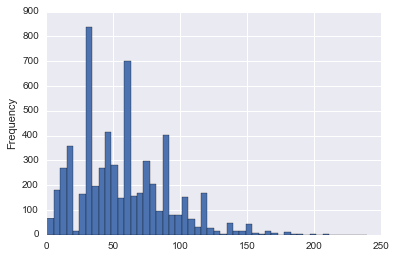

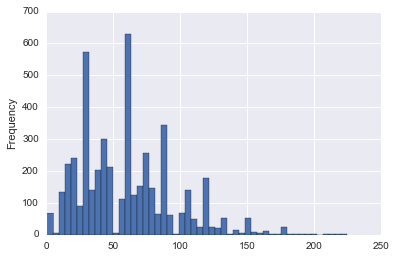

In [151]:
w_eat = people_eating[people_eating.TESEX == 2].TUACTDUR
w_eat.plot.hist(bins=50)
plt.show()
m_eat = people_eating[people_eating.TESEX == 1].TUACTDUR
m_eat.plot.hist(bins=50)

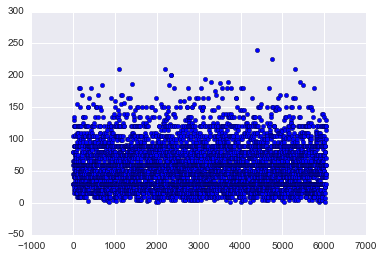

In [152]:
plt.scatter(range(len(w_eat)), w_eat)

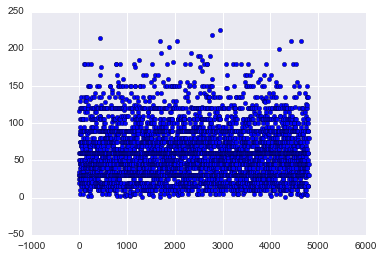

In [153]:
m_eat = people_eating[people_eating.TESEX == 1].TUACTDUR
plt.scatter(range(len(m_eat)), m_eat)

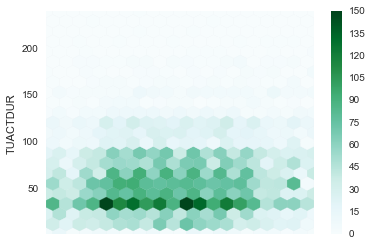

In [154]:
people_eating.plot(kind='hexbin', x='TEAGE', y='TUACTDUR', gridsize=20)

In [155]:
activities.head()
ay = activities.groupby(['TUTIER1CODE', 'TUTIER2CODE'])
ay = ay.agg({'TUCASEID': np.size, 'TUACTDUR': np.mean})

In [156]:
len(activities)

223249

In [157]:
len(roster)

11592

In [158]:
act_rost = pd.merge(activities, roster, on='TUCASEID', how='outer')
act_rost.head()
len(act_rost)

223249

In [159]:
ar_copy = act_rost.copy()
ar_copy.drop(['TUACTDUR', 'TUACTIVITY_N', 'TRCODE', 'TRTIER2'], 1, inplace=True)
activities_count = ar_copy.groupby(['TUTIER1CODE', 'TUTIER2CODE', 'TUTIER3CODE', 'TESEX', 'TEAGE']).count()
activities_count.head()

TUCASEID
TUTIER1CODE TUTIER2CODE TUTIER3CODE TESEX TEAGE          
1           1           1           1     15          114
                                          16          193
                                          17          173
                                          18          107
                                          19           89

In [160]:
activities_count.loc[15].loc[1].loc[1].sum()

TUCASEID    156
dtype: int64

There are 116 reports of 15-year-old males sleeping on the day in question. Total number of male 15-year-olds surveyed = 56.

In [161]:
r_counts = roster.groupby(['TESEX', 'TEAGE']).count()
r_counts = r_counts.rename(columns={'TUCASEID': 'resp_count'})
r_counts.head()

resp_count
TESEX TEAGE            
1     15             56
      16             92
      17             80
      18             50
      19             41

In [162]:
# dunno = pd.merge(activities_count, r_counts, on=r_counts.index, how='outer')
counts = r_counts.reset_index()
act = activities_count.reset_index()
c_activities = pd.merge(act, counts, on=['TESEX', 'TEAGE'], how='outer')
c_activities['reports_per_resp'] = c_activities.TUCASEID / c_activities.resp_count
c_activities.drop('resp_count', 1, inplace=True)
c_activities.head()

,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TESEX,TEAGE,TUCASEID,reports_per_resp
0,1,1,1,1,15,114,2.035714
1,1,1,2,1,15,2,0.035714
2,1,2,1,1,15,86,1.535714
3,1,3,1,1,15,1,0.017857
4,2,1,1,1,15,9,0.160714


In [163]:
ar_copy = act_rost.copy()
ar_copy.drop(['TUCASEID', 'TUACTIVITY_N', 'TRCODE', 'TRTIER2'], 1, inplace=True)
activities_dur = ar_copy.groupby(['TUTIER1CODE', 'TUTIER2CODE', 'TUTIER3CODE', 'TESEX', 'TEAGE']).mean()
activities_dur.reset_index(inplace=True)
activities_dur.head()

,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TESEX,TEAGE,TUACTDUR
0,1,1,1,1,15,395.052632
1,1,1,1,1,16,387.792746
2,1,1,1,1,17,392.942197
3,1,1,1,1,18,378.654206
4,1,1,1,1,19,392.280899


In [164]:
the_activities = pd.merge(c_activities, activities_dur, how='outer')
the_activities = the_activities.rename(columns={'TUCASEID': 'reports', 'TUACTDUR': 'duration'})
the_activities.head()

,TUTIER1CODE,TUTIER2CODE,TUTIER3CODE,TESEX,TEAGE,reports,reports_per_resp,duration
0,1,1,1,1,15,114,2.035714,395.052632
1,1,1,2,1,15,2,0.035714,292.500000
2,1,2,1,1,15,86,1.535714,20.593023
3,1,3,1,1,15,1,0.017857,2.000000
4,2,1,1,1,15,9,0.160714,23.333333


In [165]:
grouped_activities = the_activities.groupby(['TUTIER1CODE', 'TUTIER2CODE', 'TUTIER3CODE', 'TESEX', 'TEAGE']).sum()
grouped_activities

reports  reports_per_resp  \
TUTIER1CODE TUTIER2CODE TUTIER3CODE TESEX TEAGE                              
1           1           1           1     15         114          2.035714   
                                          16         193          2.097826   
                                          17         173          2.162500   
                                          18         107          2.140000   
                                          19          89          2.170732   
                                          20          95          2.111111   
                                          21          58          2.000000   
                                          22          80          2.051282   
                                          23         108          1.963636   
                                          24          94          2.043478   
                                          25          97          2.155556   
                                          26         144          2.086957   
                                          27         129          2.047619   
                                          28         168          2.100000   
                                          29         143          2.072464   
                                          30         173          2.035294   
                                          31         156          1.950000   
                                          32         201          1.990099   
                                          33         170          1.954023   
                                          34         236          2.107143   
                                          35         174          2.023256   
                                          36         184          2.067416   
                                          37         172          2.000000   
                                          38         189          1.948454   
                                          39         204          2.019802   
                                          40         204          2.000000   
                                          41         148          1.973333   
                                          42         193          1.892157   
                                          43         209          2.090000   
                                          44         201          2.072165   
...                                                  ...               ...   
50          1           6           2     85          24          0.130435   
                        7           1     25           1          0.022222   
                                          39           2          0.019802   
                                          51           2          0.021053   
                                          63           1          0.014493   
                                          69           1          0.017544   
                                          71           1          0.016393   
                                          80           1          0.008197   
                                    2     16           1          0.014706   
                                          17           2          0.031746   
                                          18           1          0.017857   
                                          21           2          0.036364   
                                          35           2          0.016667   
                                          40           2          0.018182   
                                          41           1          0.008000   
                                          44           1          0.007407   
                                          46           1          0.008772   
                                          47           1          0.009434   
                                          48           2          0.021

Make up of people who reported socializing/comunicating (coded 120101) with others:

In [166]:
grouped_activities.loc[12].loc[1].loc[1].loc[2].mean()

reports             59.089552
reports_per_resp     0.624162
duration            68.688531
dtype: float64

In [167]:
grouped_activities.loc[12].loc[1].loc[1].loc[1].mean().reports_per_resp

0.53476691446718894

53% of men reported socializing/communicating for an average duration of 78 minutes.<br>
62% of women reported socializing/communicating for an average duratino of 68 minutes.

In [57]:
grouped_activities.loc[2].loc[1].mean()

reports             17.474157
reports_per_resp     0.185449
duration            53.939651
dtype: float64

Overall, 18% of people reported doing housework.

In [58]:
grouped_activities.loc[2].loc[1].loc[1].loc[1].mean()

reports             14.477612
reports_per_resp     0.187805
duration            71.971235
dtype: float64

18.8% of male respondents reported interior house cleaning.

In [59]:
grouped_activities.loc[2].loc[1].loc[1].loc[2].mean()

reports             41.194030
reports_per_resp     0.418484
duration            74.556546
dtype: float64

41.8 % of women reported interior house cleaning.

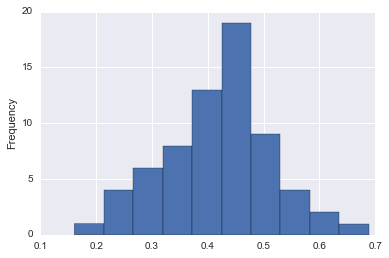

In [60]:
w = grouped_activities.loc[2].loc[1].loc[1].loc[2]['reports_per_resp']
w.head()
w.plot(kind='hist')
plt.show()

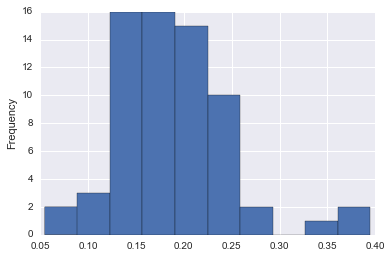

In [121]:
m = grouped_activities.loc[2].loc[1].loc[1].loc[1]['reports_per_resp']
m.head()
m.plot(kind='hist')
plt.show()

These histograms show the most common percentage of repsondants that reported interior house cleaning across age groups.

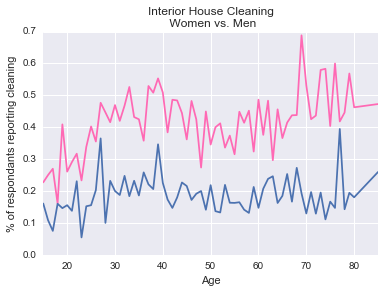

In [62]:
w.plot(kind='line', c='hotpink')
m.plot(kind='line')
plt.title('Interior House Cleaning\n Women vs. Men')
plt.xlabel('Age')
plt.ylabel('% of respondants reporting cleaning')
plt.show()

This line graph shows that women consitently do more interior cleaning than men at any age and that older people do more housework than younger people.

In [63]:
cor = act_sum.corr()
cor.head()

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181601,t181699,t181801,t181899,t189999,t500101,t500103,t500105,t500106,t500107
tucaseid,1.000000,0.032235,0.006124,-0.007162,-0.017115,-0.014749,0.000874,-0.006381,0.014979,-0.010093,...,-0.005859,-0.006674,-0.005857,-0.009457,-0.004173,-0.040702,-0.016699,0.002191,-0.017501,-0.009540
TUFINLWGT,0.032235,1.000000,-0.020603,-0.213174,-0.093590,-0.135534,-0.004744,-0.025933,-0.011965,-0.027283,...,-0.004466,0.001674,-0.008920,-0.008441,-0.008630,0.005873,0.001493,0.010360,-0.017711,-0.006392
TRYHHCHILD,0.006124,-0.020603,1.000000,-0.365897,0.004457,-0.080447,0.023713,-0.032566,-0.003213,-0.127396,...,-0.003802,-0.002671,-0.001719,0.003602,0.020722,0.015719,0.013646,0.000088,-0.035564,0.020727
TEAGE,-0.007162,-0.213174,-0.365897,1.000000,0.051919,0.023732,-0.077561,0.128753,0.040644,0.358194,...,0.002560,-0.007163,-0.008693,0.006390,-0.002466,-0.012960,-0.012961,-0.018435,0.099584,-0.000314
TESEX,-0.017115,-0.093590,0.004457,0.051919,1.000000,0.014751,-0.008349,0.005778,-0.008446,0.148272,...,-0.001596,0.008267,0.009822,-0.014759,-0.004464,0.009056,0.015994,-0.005071,0.018821,0.010795


In [64]:
cor.head()

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181601,t181699,t181801,t181899,t189999,t500101,t500103,t500105,t500106,t500107
tucaseid,NaN,0.032235,0.006124,-0.007162,-0.017115,-0.014749,0.000874,-0.006381,0.014979,-0.010093,...,-0.005859,-0.006674,-0.005857,-0.009457,-0.004173,-0.040702,-0.016699,0.002191,-0.017501,-0.009540
TUFINLWGT,0.032235,NaN,-0.020603,-0.213174,-0.093590,-0.135534,-0.004744,-0.025933,-0.011965,-0.027283,...,-0.004466,0.001674,-0.008920,-0.008441,-0.008630,0.005873,0.001493,0.010360,-0.017711,-0.006392
TRYHHCHILD,0.006124,-0.020603,NaN,-0.365897,0.004457,-0.080447,0.023713,-0.032566,-0.003213,-0.127396,...,-0.003802,-0.002671,-0.001719,0.003602,0.020722,0.015719,0.013646,0.000088,-0.035564,0.020727
TEAGE,-0.007162,-0.213174,-0.365897,NaN,0.051919,0.023732,-0.077561,0.128753,0.040644,0.358194,...,0.002560,-0.007163,-0.008693,0.006390,-0.002466,-0.012960,-0.012961,-0.018435,0.099584,-0.000314
TESEX,-0.017115,-0.093590,0.004457,0.051919,NaN,0.014751,-0.008349,0.005778,-0.008446,0.148272,...,-0.001596,0.008267,0.009822,-0.014759,-0.004464,0.009056,0.015994,-0.005071,0.018821,0.010795


In [99]:
cor.plot(kind='scatter', x='t020101', y='TESEX', grid=False, c=sns.color_palette('cool'))
plt.title('Correlation: Sex & House Cleaning')
sns.despine()
plt.show()

NameError: name 'cor' is not defined

This plot shows the positive correlation between sex and house_cleaning.

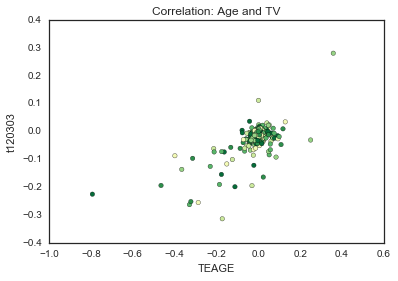

In [172]:
cor.plot(kind='scatter', x='TEAGE', y='t120303', c=sns.color_palette('YlGn'))
plt.title('Correlation: Age and TV')
plt.show()

This plot shows a positive correlation betwen age and time spent watching television.

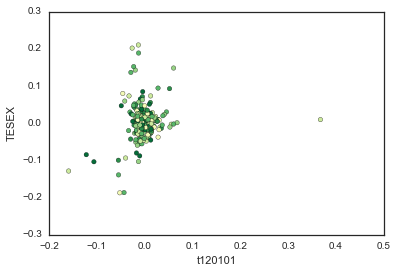

In [169]:
cor.plot(kind='scatter', x='t120101', y='TESEX', c=sns.color_palette('YlGn'))
plt.show()

This is a scatter plot that shows a lack of correlation between time spent socializing and sex.